In [ ]:
import sys
sys.path.append('../..')

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from DomainPrediction.utils import helper

In [ ]:
data_path = '../../../Data/al_test_experiments/GB1'

#### Load dataset for processing

In [ ]:
df_train = pd.read_pickle(os.path.join(data_path, 'train.pkl'))
df_val = pd.read_pickle(os.path.join(data_path, 'valid.pkl'))
df_test = pd.read_pickle(os.path.join(data_path, 'test.pkl'))

In [ ]:
df_train.head()

In [ ]:
wt = helper.read_fasta(os.path.join(data_path, 'GB1_WT.fasta'), mode='str')[0]

In [ ]:
## sanity check againts wildtype len
for _df in [df_train, df_val, df_test]:
    for i, row in _df.iterrows():
        assert len(wt) == len(row['primary'])

In [ ]:
df_train['split_id'] = 2
df_val['split_id'] = 1
df_test['split_id'] = 0

In [ ]:
df = pd.concat([df_train, df_val, df_test]).reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
df_new = df[['primary', 'gb1_score', 'split_id']].copy()
df_new.columns = ['seq', 'fitness_raw', 'split_id']

In [ ]:
df_new.head()

In [ ]:
n_muts = []
for i, row in df_new.iterrows():
    variant_seq = row["seq"]
    assert len(variant_seq) == len(wt)
    n = 0
    for a, b in zip(variant_seq, wt):
        if a != b:
            n += 1
    
    n_muts.append(n)

df_new['n_mut'] = n_muts

In [ ]:
df_new.head()

In [ ]:
df_new['n_mut'].unique()

In [ ]:
from collections import Counter

In [ ]:
for split in df_new['split_id'].unique():
    temp = df_new.loc[df_new['split_id']==split, 'n_mut'].unique()
    print(f'n mutation for split {split}: {temp}')
    print(Counter(df_new.loc[df_new['split_id']==split, 'n_mut']))

In [ ]:
temp = []
for x in df_new['fitness_raw']:
    if x == 0:
        temp.append(1e-6)
    else:
        temp.append(x)

In [ ]:
df_new['fitness_log'] = np.log(temp)

In [ ]:
file = os.path.join(data_path, 'dataset_gb1.csv')
df_new.to_csv(file, index=False)

#### Load dataset for analysis

In [7]:
file = os.path.join(data_path, 'dataset_gb1.csv')
df_new = pd.read_csv(file)

Text(0.5, 1.0, 'Test')

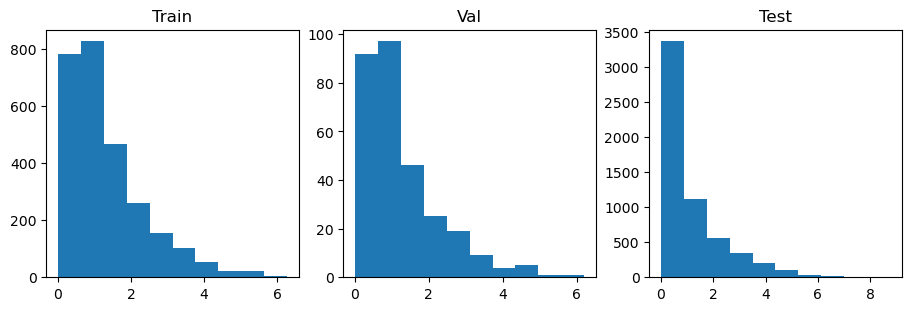

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_raw'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_raw'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_raw'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

Text(0.5, 1.0, 'Test')

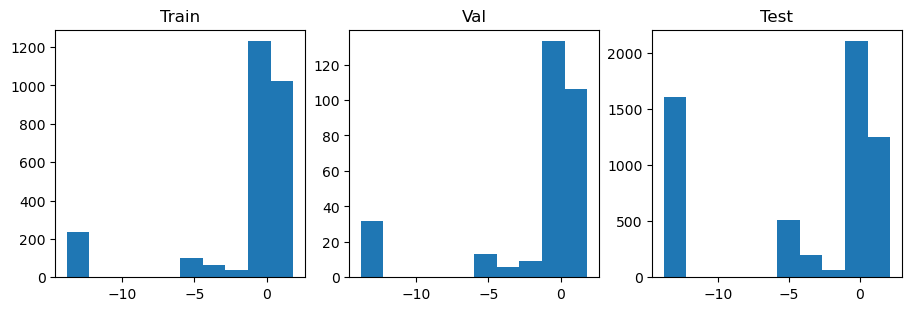

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_log'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_log'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_log'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

In [10]:
df_new['n_mut'].unique()

array([0, 1, 2, 3, 4])

In [11]:
df_new[df_new['n_mut']==0]

,seq,fitness_raw,split_id,n_mut,fitness_log
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.0,2,0,0.0


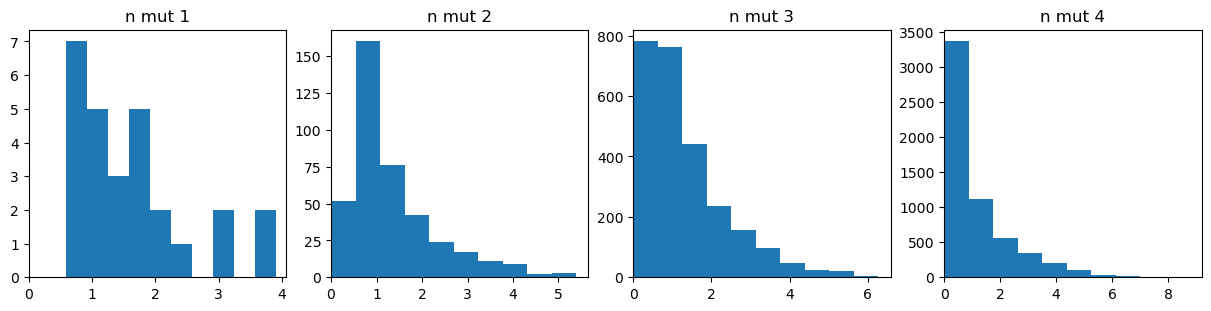

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), layout='constrained')
for i, n_mut in enumerate([1, 2, 3, 4]):
    ax[i].hist(df_new.loc[df_new['n_mut']==n_mut, 'fitness_raw'])
    ax[i].set_title(f'n mut {n_mut}')
    ax[i].set_xlim(left=0)

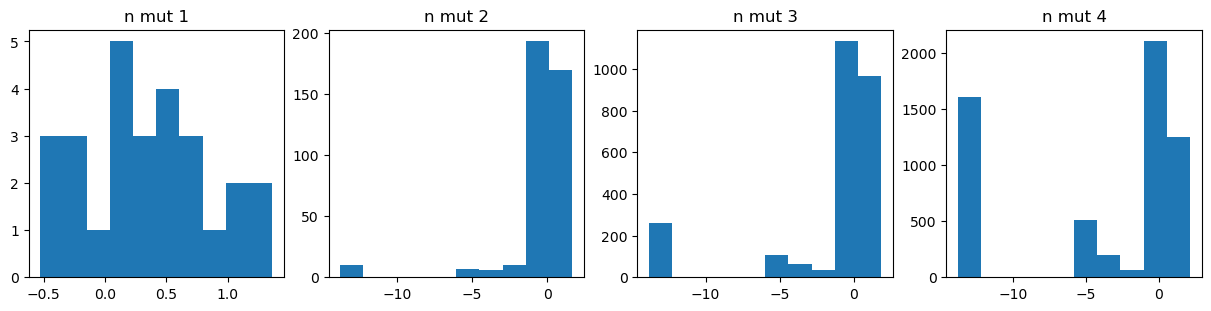

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), layout='constrained')
for i, n_mut in enumerate([1, 2, 3, 4]):
    ax[i].hist(df_new.loc[df_new['n_mut']==n_mut, 'fitness_log'])
    ax[i].set_title(f'n mut {n_mut}')

In [15]:
wt = helper.read_fasta(os.path.join(data_path, 'GB1_WT.fasta'), mode='str')[0]

In [23]:
mask = df_new['n_mut'] == 4
positions = set()
for i, row in df_new.loc[mask].iterrows():
    variant_seq = row["seq"]
    assert len(variant_seq) == len(wt)
    n = 0
    pos = []
    for i, (a, b) in enumerate(zip(variant_seq, wt)):
        if a != b:
            n += 1
            pos.append(i)
    print(pos)
    positions.add(tuple(pos))

[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 53]
[38, 39, 40, 5

In [24]:
positions

{(38, 39, 40, 53)}

In [27]:
df_new['n_mut'].isin([1,2]).sum()

423